In [3]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import shiftgrid
from mpl_toolkits.basemap import Basemap
from numpy import meshgrid
import pandas as pd

In [4]:
idir = '/short/w35/dh4185/RA_Ailie/data/REGEN_LongTermStns_v1/corr/'

In [5]:
lsmask = xr.open_dataset(idir+'topography_landmask.erainterim_1deg.nc').squeeze(dim='time')
mask   = np.ma.masked_greater(lsmask['topo'],-.1)

In [6]:
# reading in correlations of four indices and concatenating them
ds_sdii = xr.open_dataset(idir+'corr_SPI12_SDII_LongTermStns_TH-1.5_pval.nc').where(mask.mask)
ds_w = xr.open_dataset(idir+'corr_SPI12_W_LongTermStns_TH-1.5_pval.nc').where(mask.mask)
ds_rx1 = xr.open_dataset(idir+'corr_SPI12_Rx1day_mean_LongTermStns_TH-1.5_pval.nc').where(mask.mask)
ds_rx5 = xr.open_dataset(idir+'corr_SPI12_Rx5day_mean_LongTermStns_TH-1.5_pval.nc').where(mask.mask)

In [7]:
ds = xr.concat([ds_sdii,ds_w,ds_rx1,ds_rx5],pd.Index(['sdii','w','rx1','rx5'],name='index'))
print(ds['index'][0].values)

sdii


In [25]:
# This was a different approach but not faster either (also misses some details like grid or colourbar, etc)
# X, Y = np.meshgrid(ds.lon, ds.lat)
# fig, axes = plt.subplots(2, 1,figsize=(18,18))
# axes[0].contourf(X,Y,ds.sel(index='sdii')['r'].where(mask.mask),levels=10)
# sig = ds.sel(index='sdii').p_val.where(ds.sel(index='sdii').p_val < 0.05).where(mask.mask)
# axes[0].pcolor(X, Y, sig, hatch='..', alpha=0)
# # axes[0].coastlines()

# axes[1].contourf(X,Y,ds.sel(index='sdii')['r_drought_-1.5'].where(mask.mask),levels=10)
# sig = ds.sel(index='sdii').p_val_dr.where(ds.sel(index='sdii').p_val_dr < 0.05).where(mask.mask)
# axes[1].pcolor(X, Y, sig, hatch='..', alpha=0)
# # axes[1].coastlines()

/Users/david/anaconda/envs/py3_stable/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/david/anaconda/envs/py3_stable/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/david/anaconda/envs/py3_stable/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/david/anaconda/envs/py3_stable/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect

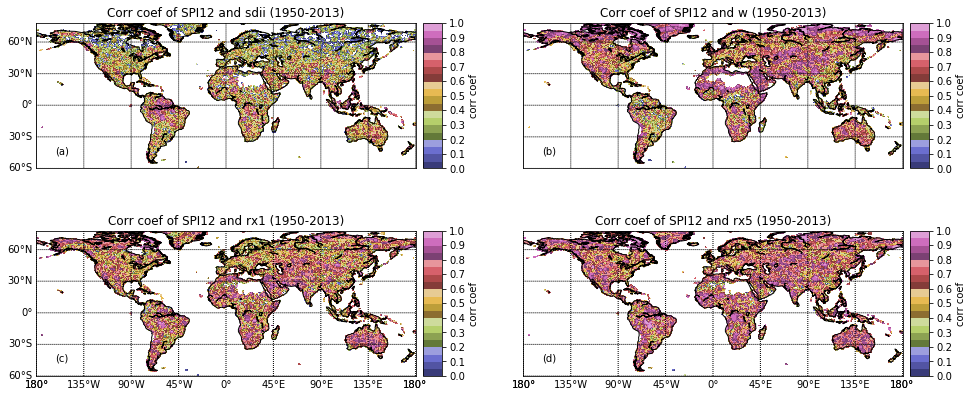

In [27]:
# This is the routine I use. Commenting out the stippling creates the plot much quicker. I'm also not familiar with the warning showing up.
# That must be new with python3?
fig = plt.figure(figsize=[16,7])
subplots = [221,222,223,224]
lonlabels = [[0,0,0,0],[0,0,0,0],[0,0,0,1],[0,0,0,1]]
latlabels = [[1,0,0,0],[0,0,0,0],[1,0,0,0],[0,0,0,0]]
numbering = ['(a)','(b)','(c)','(d)']

for i,sb in enumerate(subplots):
    ax = fig.add_subplot(sb)
    map = Basemap(llcrnrlon=-180.,llcrnrlat=-60.,urcrnrlon=180.,urcrnrlat=78.,projection='cyl',lat_0=0, lon_0=0)
    x = ds['lon'].data
    y = ds['lat'].data
    xx, yy = meshgrid(x, y)
    map.contourf(xx, yy, ds.isel(index=i)['r_drought_-1.5'].where(ds.isel(index=i)['q_mask']>0),latlon=True,cmap='tab20b',levels=np.linspace(0,1,21))
    cb = map.colorbar(location='right',label='corr coef')
    cb.set_ticks(np.round(np.arange(0,1.1,0.1),1))
    cb.set_ticklabels(np.round(np.arange(0,1.1,0.1),1))
    
#     sig = ds.isel(index=i).p_val_dr.where(ds.isel(index=i).p_val_dr < 0.01)
#     map.pcolor(xx, yy, sig, hatch='..', alpha=0)

    map.drawmeridians(range(-180, 180, 45),labels=lonlabels[i],fontsize=10)
    map.drawparallels(range(-90, 90, 30),labels=latlabels[i],fontsize=10)
    map.drawcoastlines()
    plt.annotate(numbering[i], xy=(0.05, 0.1), xycoords='axes fraction')
    plt.title('Corr coef of {} and {} (1950-2013)'.format(spi,ds['index'][i].values))
# plt.tight_layout()
# plt.savefig(idir+'test2.png')